In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as linalg
import scipy.sparse as sparse
import scipy.sparse.linalg as linalgs

## String

In [191]:
class StringProb():
    def p(self, x=None):
        return(1.) 
    def q(self, x=None):
        return(0.)
    def __init__(self, N=101, q0=0., p0=0.):
        self.q0 = q0
        self.p0 = p0
        self.N = N
        self.h = 1. / (np.float64(N) + 1.)
        self.x = (np.arange(self.N, dtype=np.float64) + 1.) * self.h
        diagonal = ((self.p(self.x - 0.5 * self.h) +
                     self.p(self.x + 0.5 * self.h)) / self.h**2
                    + self.q(self.x))
        offdiagonal = - (self.p(self.x[1:] - 0.5 * self.h)) / self.h**2
        self.A = sparse.diags(diagonals=[offdiagonal, diagonal, offdiagonal],
                              offsets=[-1, 0, 1], shape=(N, N))

In [192]:
st = StringProb()
print(st.A.toarray())

[[ 20808. -10404.      0. ...,      0.      0.      0.]
 [-10404.  20808. -10404. ...,      0.      0.      0.]
 [     0. -10404.  20808. ...,      0.      0.      0.]
 ..., 
 [     0.      0.      0. ...,  20808. -10404.      0.]
 [     0.      0.      0. ..., -10404.  20808. -10404.]
 [     0.      0.      0. ...,      0. -10404.  20808.]]


In [193]:
(evals, evecs) = linalg.eig(st.A.toarray())

In [194]:
print(evals[np.argsort(evals)])

[  9.86882420e+00   3.94659356e+01   8.87632597e+01   1.57714035e+02
   2.46252857e+02   3.54295742e+02   4.81740204e+02   6.28465355e+02
   7.94332017e+02   9.79182855e+02   1.18284253e+03   1.40511785e+03
   1.64579798e+03   1.90465462e+03   2.18144223e+03   2.47589826e+03
   2.78774340e+03   3.11668184e+03   3.46240157e+03   3.82457465e+03
   4.20285753e+03   4.59689141e+03   5.00630249e+03   5.43070245e+03
   5.86968870e+03   6.32284485e+03   6.78974105e+03   7.26993441e+03
   7.76296945e+03   8.26837849e+03   8.78568212e+03   9.31438964e+03
   9.85399955e+03   1.04040000e+04   1.09638693e+04   1.15330763e+04
   1.21110811e+04   1.26973355e+04   1.32912834e+04   1.38923613e+04
   1.44999992e+04   1.51136205e+04   1.57326433e+04   1.63564804e+04
   1.69845400e+04   1.76162264e+04   1.82509404e+04   1.88880800e+04
   1.95270407e+04   2.01672164e+04   2.08080000e+04   2.14487836e+04
   2.20889593e+04   2.27279200e+04   2.33650596e+04   2.39997736e+04
   2.46314600e+04   2.52595196e+04

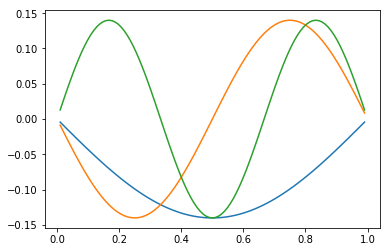

In [195]:
for i in np.arange(3):
    plt.plot(st.x, evecs[:,np.argsort(evals)[i]])

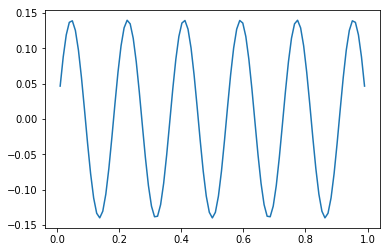

In [196]:
plt.plot(st.x, evecs[:,np.argsort(evals)[10]])

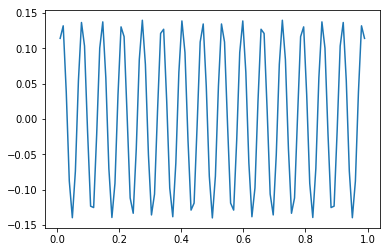

In [197]:
plt.plot(st.x, evecs[:,np.argsort(evals)[30]])

In [198]:
class StringProbSpringy(StringProb):
    def q(self, x):
        return(self.q0)

In [215]:
stq = StringProbSpringy(q0=100.1)

In [216]:
print(stq.A.toarray())

[[ 20908.1 -10404.       0.  ...,      0.       0.       0. ]
 [-10404.   20908.1 -10404.  ...,      0.       0.       0. ]
 [     0.  -10404.   20908.1 ...,      0.       0.       0. ]
 ..., 
 [     0.       0.       0.  ...,  20908.1 -10404.       0. ]
 [     0.       0.       0.  ..., -10404.   20908.1 -10404. ]
 [     0.       0.       0.  ...,      0.  -10404.   20908.1]]


In [217]:
(evals, evecs) = linalg.eig(stq.A.toarray())

In [218]:
print(evals[np.argsort(evals)])

[   109.9688242     139.56593564    188.86325965    257.81403475
    346.35285693    454.39574178    581.84020406    728.56535498
    894.43201686   1079.28285511   1282.94252752   1505.21785055
   1745.8979826    2004.75462398   2281.54223348   2575.9982613
   2887.84339805   3216.78183974   3562.50156832   3924.67464769
   4302.95753475   4696.99140527   5106.40249425   5530.80245047
   5969.78870488   6422.9448524    6889.841047     7370.03440935
   7863.06944696   8368.47848622   8885.78211606   9414.48964264
   9954.09955485  10504.1         11063.96926936  11633.176293
  12211.1811436   12797.43554853  13391.38340998  13992.46133243
  14600.09915706  15213.72050258  15832.74331198  16456.58040464
  17084.64003327  17716.32644528  18351.04044785  18988.17997629
  19627.14066516  20267.31642156  20908.1         21548.88357844
  22189.05933484  22828.02002371  23465.15955215  24099.87355472
  24731.55996673  25359.61959536  25983.45668802  26602.47949742
  27216.10084294  27823.7386

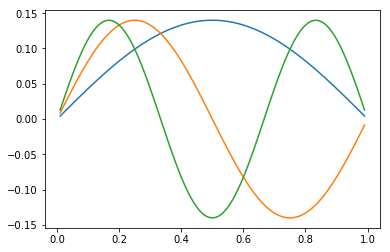

In [219]:
for i in np.arange(3):
    plt.plot(stq.x, evecs[:,np.argsort(evals)[i]])